# Aprendizado de Máquina - ICMC
- Alef Segura Santos, 9762942
- Gustavo de Moura Souza, 9762981

### Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow
from skimage.util import random_noise, invert, noise
from skimage.transform import rotate
from skimage.filters import gaussian
from skimage.feature import hog

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

____
## Parte 1 - Pré-processamento

### Data Augmentation

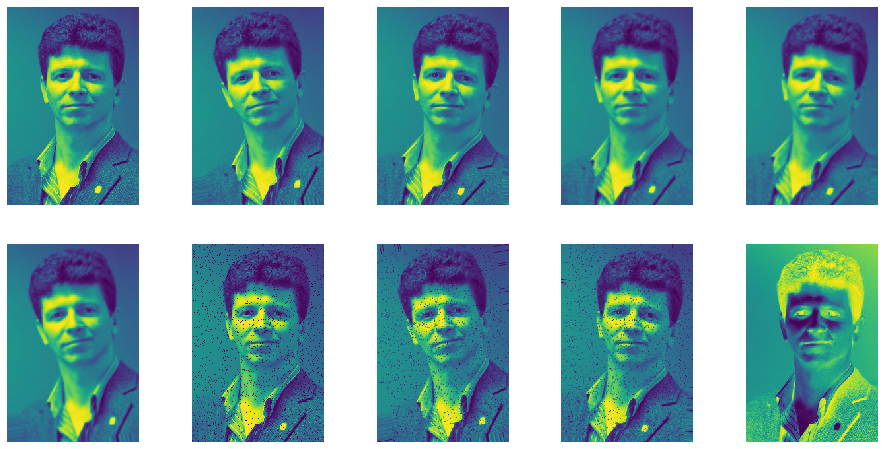

In [2]:
images = []
labels = []

for i in range(20):
    folder = 'datasets/PessoasICMC/p' + str(i+1) + '/'
    image_name = str(i+1)
    
    image = imread(image_name + '.png')
    image_10r = rotate(image, preserve_range=True, mode='edge', cval=1, angle=10)
    image_10l = rotate(image, preserve_range=True, mode='edge', cval=1, angle=355)
    
    image_blur = gaussian(image, 1)
    image_10r_blur = gaussian(image_10l, 1) 
    image_10l_blur = gaussian(image_10r, 1) 
    
    image_noisy = random_noise(image, mode='pepper')
    image_10r_noisy = rotate(image_noisy, preserve_range=True, mode='edge', cval=1, angle=10)
    image_10l_noisy = rotate(image_noisy, preserve_range=True, mode='edge', cval=1, angle=355)
    
    image_invert = invert(image)
    
    labels += [image_name for i in range(10)]
    images += [image, image_10r, image_10l, image_blur, image_10r_blur, 
               image_10l_blur, image_noisy, image_10r_noisy, image_10l_noisy, image_invert]
    
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.grid(False)
    plt.imshow(images[i+50])
    plt.gca().set_frame_on(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().get_xaxis().set_visible(False)
plt.show()

### Histogram of Oriented Gradients

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


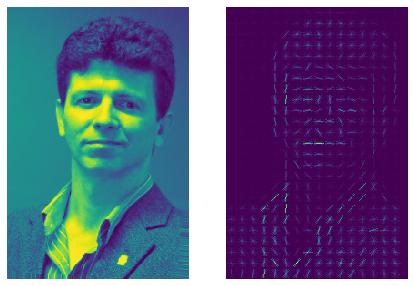

In [3]:
images_hog = []
for img in images:
    images_hog.append(hog(img, visualize=True, pixels_per_cell=(12,12)))
    

fig = plt.figure(figsize=(15,5))

fig.add_subplot(141)
plt.grid(False)
plt.imshow(images[52])
plt.gca().set_frame_on(False)
plt.gca().get_yaxis().set_visible(False)
plt.gca().get_xaxis().set_visible(False)
    
fig.add_subplot(142)
plt.grid(False)
plt.imshow(images_hog[52][1])
plt.gca().set_frame_on(False)
plt.gca().get_yaxis().set_visible(False)
plt.gca().get_xaxis().set_visible(False)

___
## Parte 2 - Classificadores

In [0]:
# X/y
X = [img[0] for img in images_hog]
y = labels

# KFold
kf = StratifiedKFold(10)

### Hyerparameters Search

#### KNN

In [0]:
scores_knn = []
K = [3, 5, 7, 9, 13]
for k in K:
    knn = KNeighborsClassifier(k)
    cv = cross_validate(knn, X, y, cv=kf, return_train_score=True, verbose=1, n_jobs=-1)
    score = {'K' : k,
             'Test Scores' : cv['test_score'],
             'Test Mean' : np.mean(cv['test_score']),
             'Train Scores' :cv['train_score'],
             'Train Mean' : np.mean(cv['train_score'])}
    print(score)
    scores_knn.append(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 3, 'Test Scores': array([1. , 1. , 1. , 1. , 1. , 1. , 0.7, 0.5, 0.5, 1. ]), 'Test Mean': 0.8699999999999999, 'Train Scores': array([0.92777778, 0.92777778, 0.92777778, 0.92777778, 0.92777778,
       0.92777778, 0.86666667, 1.        , 0.88888889, 0.92777778]), 'Train Mean': 0.925}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 5, 'Test Scores': array([1.  , 0.85, 1.  , 1.  , 1.  , 0.85, 0.45, 0.65, 0.55, 1.  ]), 'Test Mean': 0.8350000000000002, 'Train Scores': array([0.87222222, 0.85      , 0.86666667, 0.87222222, 0.87222222,
       0.85555556, 0.86111111, 0.90555556, 0.9       , 0.87222222]), 'Train Mean': 0.8727777777777778}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 7, 'Test Scores': array([1.  , 0.85, 1.  , 1.  , 1.  , 0.85, 0.3 , 0.65, 0.5 , 1.  ]), 'Test Mean': 0.8150000000000001, 'Train Scores': array([0.82777778, 0.83333333, 0.82222222, 0.82777778, 0.82777778,
       0.83333333, 0.82777778, 0.86666667, 0.87777778, 0.82777778]), 'Train Mean': 0.8372222222222222}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 9, 'Test Scores': array([1.  , 0.65, 1.  , 1.  , 1.  , 0.65, 0.25, 0.65, 0.4 , 1.  ]), 'Test Mean': 0.76, 'Train Scores': array([0.82222222, 0.80555556, 0.81666667, 0.82222222, 0.82222222,
       0.80555556, 0.82222222, 0.83888889, 0.86111111, 0.82222222]), 'Train Mean': 0.8238888888888889}
{'K': 13, 'Test Scores': array([1.  , 0.6 , 1.  , 1.  , 1.  , 0.65, 0.15, 0.4 , 0.5 , 1.  ]), 'Test Mean': 0.7300000000000001, 'Train Scores': array([0.78888889, 0.78333333, 0.78333333, 0.78888889, 0.78333333,
       0.78333333, 0.77777778, 0.82777778, 0.82777778, 0.78888889]), 'Train Mean': 0.7933333333333332}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.8s finished


In [0]:
df_knn = pd.DataFrame(scores_knn).set_index('K')
df_knn

,Test Mean,Test Scores,Train Mean,Train Scores
K,,,,
3,0.870,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.5, 0.5, ...",0.925000,"[0.9277777777777778, 0.9277777777777778, 0.927..."
5,0.835,"[1.0, 0.85, 1.0, 1.0, 1.0, 0.85, 0.45, 0.65, 0...",0.872778,"[0.8722222222222222, 0.85, 0.8666666666666667,..."
7,0.815,"[1.0, 0.85, 1.0, 1.0, 1.0, 0.85, 0.3, 0.65, 0....",0.837222,"[0.8277777777777777, 0.8333333333333334, 0.822..."
9,0.760,"[1.0, 0.65, 1.0, 1.0, 1.0, 0.65, 0.25, 0.65, 0...",0.823889,"[0.8222222222222222, 0.8055555555555556, 0.816..."
13,0.730,"[1.0, 0.6, 1.0, 1.0, 1.0, 0.65, 0.15, 0.4, 0.5...",0.793333,"[0.7888888888888889, 0.7833333333333333, 0.783..."


#### MLP

In [0]:
# MLP
scores_mlp = []
layers = [(8,), (12,), (11,5), (15,9)]
alphas = [0.9, 0.5, 0.3]
momentums = [0.9, 0.7]
for layer in layers:
    for alpha in alphas:
        for momentum in momentums:
            mlp = MLPClassifier(hidden_layer_sizes=layer, alpha=alpha, momentum=momentum, max_iter=1500)
            cv = cross_validate(mlp, X, y, cv=kf, return_train_score=True, verbose=1)
            score = {'Layers' : layer,
                     'Alpha' : alpha,
                     'Momentum' : momentum,
                     'Test Score' : cv['test_score'],
                     'Test Mean' : np.mean(cv['test_score']),
                     'Train Score' : cv['train_score'],
                     'Train Mean' : np.mean(cv['train_score'])}
            print(score)
            scores_mlp.append(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (8,), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (8,), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (8,), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (8,), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (8,), 'Alpha': 0.3, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (8,), 'Alpha': 0.3, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (12,), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (12,), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (12,), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (12,), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (12,), 'Alpha': 0.3, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (12,), 'Alpha': 0.3, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'Layers': (11, 5), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  ]), 'Test Mean': 0.9949999999999999, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (11, 5), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([0.05, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 1.  ]), 'Test Mean': 0.8949999999999999, 'Train Score': array([0.05, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]), 'Train Mean': 0.905}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (11, 5), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 0.9, 1. ]), 'Test Mean': 0.9800000000000001, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (11, 5), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  ]), 'Test Mean': 0.9949999999999999, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (11, 5), 'Alpha': 0.3, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (11, 5), 'Alpha': 0.3, 'Momentum': 0.7, 'Test Score': array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  ]), 'Test Mean': 0.9949999999999999, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (15, 9), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (15, 9), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (15, 9), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (15, 9), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'Layers': (15, 9), 'Alpha': 0.3, 'Momentum': 0.9, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}
{'Layers': (15, 9), 'Alpha': 0.3, 'Momentum': 0.7, 'Test Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Test Mean': 1.0, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.2min finished


In [0]:
df_mlp = pd.DataFrame(scores_mlp).set_index(['Layers','Alpha','Momentum'])
df_mlp

Test Mean  ...                                        Train Score
Layers  Alpha Momentum             ...                                                   
(8,)    0.9   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.5   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.3   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
(12,)   0.9   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.5   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.3   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
(11, 5) 0.9   0.9           0.995  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.895  ...  [0.05, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
        0.5   0.9           0.980  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.995  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.3   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.995  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
(15, 9) 0.9   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.5   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.3   0.9           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           1.000  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...

[24 rows x 4 columns]

### Modelos Escolhidos

In [0]:
knn = KNeighborsClassifier(3)
mlp = MLPClassifier(hidden_layer_sizes=(8,), alpha=0.5, momentum=0.7, max_iter=2000)

#### Treinamento sem PCA

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,shuffle=True)

# KNN
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred, average='micro')
acc_knn = accuracy_score(y_test, y_pred)

# MLP
mlp.fit(X_test, y_test)
y_pred = mlp.predict(X_test)
cm_mlp = confusion_matrix(y_test, y_pred)
prec_mlp = precision_score(y_test, y_pred, average='micro')
acc_mlp = accuracy_score(y_test, y_pred)

#### Treinamento com PCA

In [7]:
# PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

i = 0
summ = pca.explained_variance_ratio_[i]
while(summ < 0.5):
    i +=1
    summ += pca.explained_variance_ratio_[i]    

print(i, 'componentes, variância: %.2f' % summ, '%')

15 componentes, variância: 0.51 %


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:i],y,random_state=0,shuffle=True)

# KNN
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
cm_knn_pca = confusion_matrix(y_test, y_pred)
prec_knn_pca = precision_score(y_test, y_pred, average='micro')
acc_knn_pca = accuracy_score(y_test, y_pred)

# MLP
mlp.fit(X_test, y_test)
y_pred = mlp.predict(X_test)
cm_mlp_pca = confusion_matrix(y_test, y_pred)
prec_mlp_pca = precision_score(y_test, y_pred, average='micro')
acc_mlp_pca = accuracy_score(y_test, y_pred)

___
## Parte 3 - Resultados

### Sem PCA

In [8]:
print('KNN\nMatriz de confusão:\n',cm_knn)
print('Precisão:\n',prec_knn)
print('Acurácia:\n',acc_knn)

print('\nMLP\nMatriz de confusão:\n',cm_mlp)
print('Precisão:\n',prec_mlp)
print('Acurácia:\n',acc_mlp)

KNN
Matriz de confusão:
 [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Precisão:
 0.7
Acurácia:
 0.7

MLP
Matriz de confusão:
 [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 

### Com PCA

In [11]:
print('KNN\nMatriz de confusão:\n',cm_knn_pca)
print('Precisão:\n',prec_knn_pca)
print('Acurácia:\n',acc_knn_pca)

print('\nMLP\nMatriz de confusão:\n',cm_mlp_pca)
print('Precisão:\n',prec_mlp_pca)
print('Acurácia:\n',acc_mlp_pca)

KNN
Matriz de confusão:
 [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Precisão:
 0.74
Acurácia:
 0.74

MLP
Matriz de confusão:
 [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 